In [1]:
%matplotlib inline

import chb
import scipy.io as sio
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [2]:
chb01list = chb.summary('chb01')

In [3]:
alldata = chb.load_data(chb01list, True, False)

Loading: /Users/adamcellon/Drive/senior/thesis/data/chb01.npz
Done.


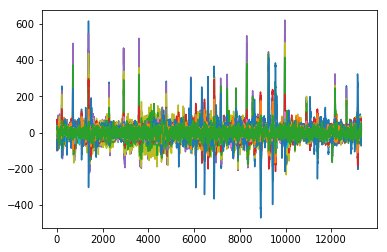

In [4]:
for i in range(alldata[0].rec.shape[0]):
    plt.plot(alldata[0].rec[i,92672:105984])

In [5]:
labeled = chb.label(alldata)

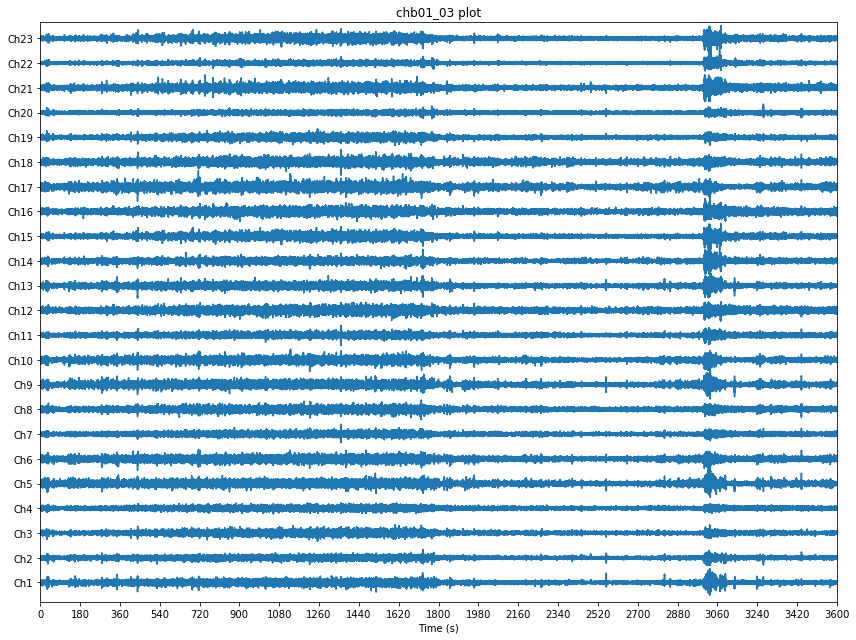

In [6]:
labeled[2].plot()

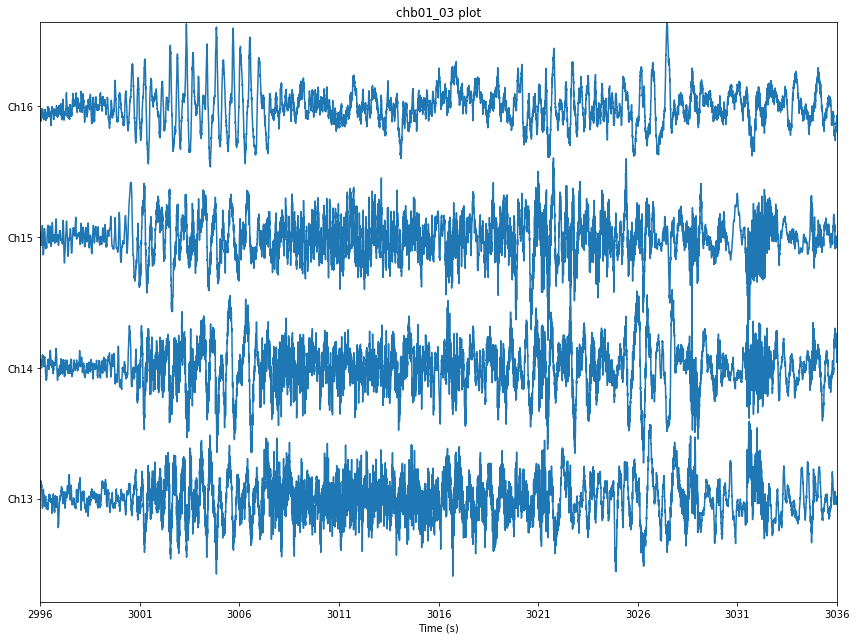

In [7]:
labeled[2].plot(labeled[2].start[0],labeled[2].end[0],13,16)

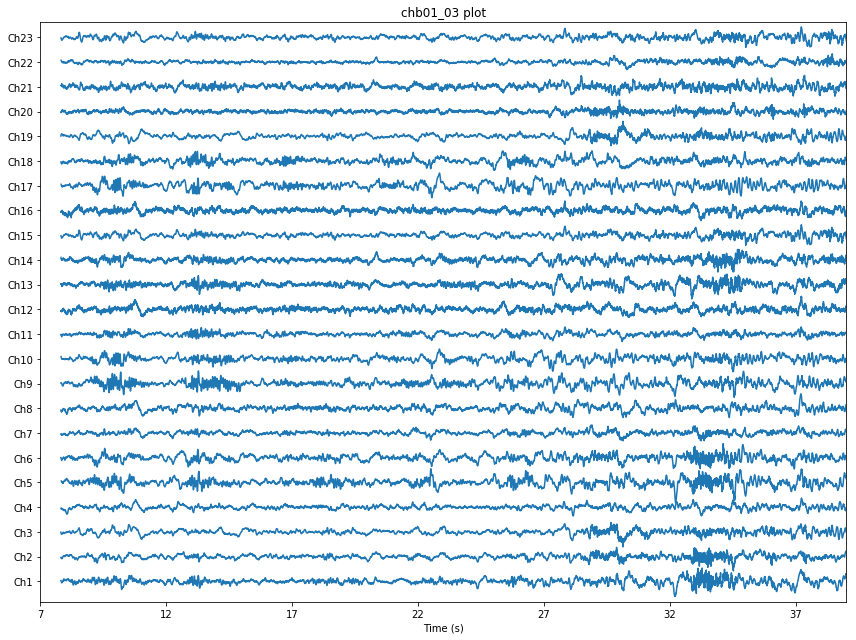

In [8]:
labeled[2].plot(2000,10000)

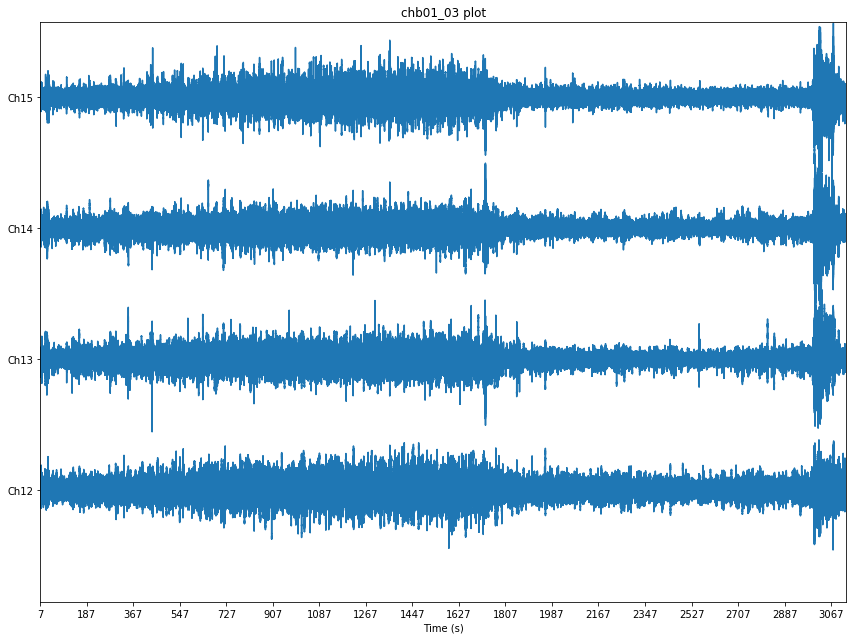

In [9]:
labeled[2].plot(2000, 800000, 12, 15)

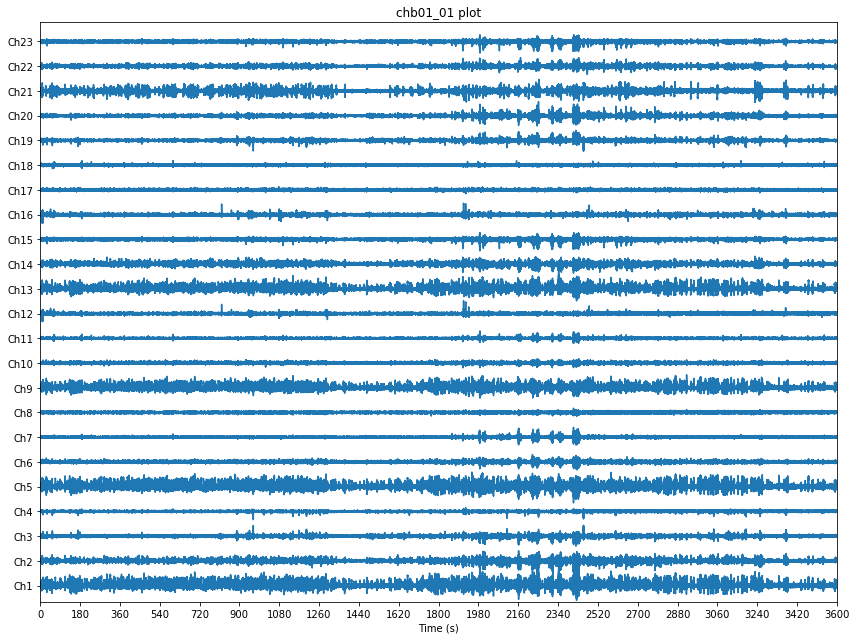

In [10]:
labeled[0].plot()

In [11]:
masked = labeled[2].rec * labeled[2].ict

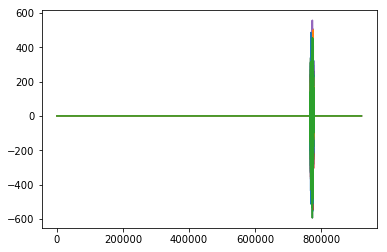

In [12]:
for i in range(masked.shape[0]):
    plt.plot(masked[i,:])

In [13]:
masked[:,masked[0,:]!=0].shape

(23, 10240)

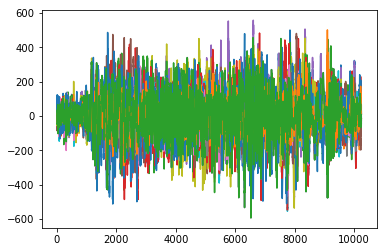

In [14]:
for i in range(masked.shape[0]):
    plt.plot(masked[i,masked[0,:]!=0])

In [15]:
masked2 = labeled[2].rec * (labeled[2].ict + labeled[2].preict)

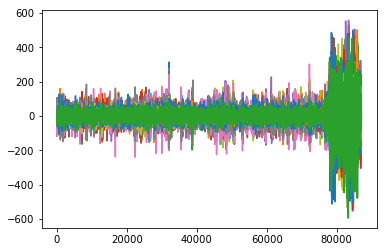

In [16]:
for i in range(masked2.shape[0]):
    plt.plot(masked2[i,masked2[0,:]!=0])

## Developing test/train split function for data


In [51]:
eeg = labeled[2]
eegset = labeled

In [18]:
eeg.info()

Name:              chb01_03
Seizure Count:     1
-Seizure 1 range:  [766976 - 777216]
EEG data:          (23, 921600) array
Ictal mask:        (23, 921600) array
Preictal mask:     (23, 921600) array


In [48]:
streamlen = 30 * 256           # length of training stream (30 sec at 256 samples/sec)
# randomly index into non-pre/ict data for streams of nonseizure data

while True:
    streamst = np.random.randint(0, eeg.rec.shape[1] - streamlen)
    streamend = streamst + streamlen
    #print('(%d,%d)' % (streamst, streamend))
    if not (eeg.ict[:,streamst:streamend].any() or eeg.preict[:,streamst:streamend].any()):
        break

stream = eeg.rec[:,streamst:streamend]
print(stream)


[[-21.68498168 -25.98290598 -22.85714286 ..., -18.55921856 -20.51282051
  -21.68498168]
 [  0.97680098   5.66544567   0.97680098 ...,   8.00976801   7.22832723
    3.32112332]
 [ 14.26129426  15.43345543  15.82417582 ...,   1.75824176   1.36752137
    0.58608059]
 ..., 
 [ -4.1025641   -1.75824176  -3.32112332 ...,  -5.27472527  -3.32112332
    0.1953602 ]
 [  0.1953602    5.27472527   0.97680098 ...,  -5.27472527  -4.88400488
   -3.32112332]
 [ 15.82417582  12.6984127    6.44688645 ...,  -4.88400488  -4.49328449
   -2.14896215]]


In [49]:
# same for seizure data - requires seizures to be at least 30 seconds (is this always the case?)
while True:
    ictstreamst = np.random.randint(0, eeg.rec.shape[1] - streamlen)
    ictstreamend = ictstreamst + streamlen
    #print('(%d,%d)' % (ictstreamst, ictstreamend))
    if eeg.ict[:,ictstreamst:ictstreamend].all():
        break

ictstream = eeg.rec[:,ictstreamst:ictstreamend]
print(ictstream)

[[ -31.06227106  -52.55189255  -41.22100122 ...,  -80.29304029
   -90.06105006 -102.95482295]
 [ -54.11477411   -4.49328449   -9.57264957 ...,   66.61782662
    52.94261294   42.39316239]
 [ -56.45909646  -56.84981685  -63.1013431  ...,   56.45909646
    57.24053724   58.02197802]
 ..., 
 [  83.80952381   77.55799756   78.33943834 ...,   16.21489621
    38.87667888   59.19413919]
 [ -83.41880342   -9.96336996  -31.06227106 ...,  -11.52625153
   -14.65201465  -11.52625153]
 [-256.50793651 -286.59340659 -251.03785104 ...,   -4.1025641   -12.6984127
   -18.16849817]]


In [50]:
while True:
    pistreamst = np.random.randint(0, eeg.rec.shape[1] - streamlen)
    pistreamend = pistreamst + streamlen
    #print('(%d,%d)' % (pistreamst, pistreamend))
    if eeg.preict[:,pistreamst:pistreamend].all():
        break

pistream = eeg.rec[:,pistreamst:pistreamend]
print(pistream)

[[  4.1025641    8.79120879   9.18192918 ..., -11.91697192 -11.13553114
  -13.08913309]
 [ -0.1953602   -0.97680098  -0.1953602  ...,  20.51282051  20.12210012
   19.34065934]
 [  0.1953602   -0.97680098  -1.36752137 ...,   1.36752137   1.75824176
    2.53968254]
 ..., 
 [ 32.62515263  31.84371184  36.14163614 ..., -32.23443223 -33.40659341
  -32.23443223]
 [  0.1953602    2.14896215   3.71184371 ...,  -2.14896215  -4.88400488
   -8.4004884 ]
 [-20.12210012 -20.51282051 -18.94993895 ...,   2.14896215   2.14896215
    1.36752137]]


In [53]:
pistream.shape

(23, 7680)